In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("green_tech_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [5]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [12]:
x = df[['carbon_emissions', 'energy_output', 'renewability_index','cost_efficiency' ]]
y = df['sustainability']

In [13]:

x

,carbon_emissions,energy_output,renewability_index,cost_efficiency
0,181.089042,128.286267,0.642032,0.732568
1,382.750007,672.769370,0.084140,2.891096
2,306.197880,382.920383,0.161629,2.932858
3,259.530469,557.713622,0.898554,3.368435
4,104.606524,916.809827,0.606429,3.767411
...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408
96,232.956490,753.360111,0.769994,4.362857
97,199.639356,907.399234,0.215821,2.430473
98,58.896694,898.377782,0.622890,3.878920


In [14]:
y

0     1
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: sustainability, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
len(X_train)

80

In [20]:
len(X_test)

20

In [21]:
len(y_train)

80

In [22]:
len(y_test)

20

In [23]:
df.corr()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
carbon_emissions,1.000000,-0.034033,-0.037654,-0.211882,-0.441912
energy_output,-0.034033,1.000000,-0.146354,-0.011783,-0.102749
renewability_index,-0.037654,-0.146354,1.000000,-0.214816,0.336193
cost_efficiency,-0.211882,-0.011783,-0.214816,1.000000,-0.361310
sustainability,-0.441912,-0.102749,0.336193,-0.361310,1.000000


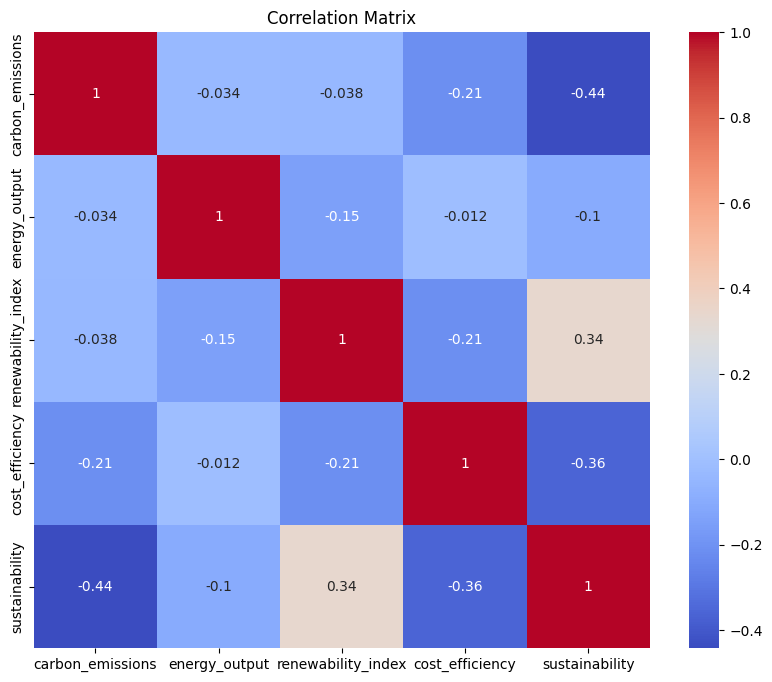

In [29]:

import seaborn as sns

def create_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

create_correlation_matrix(df)

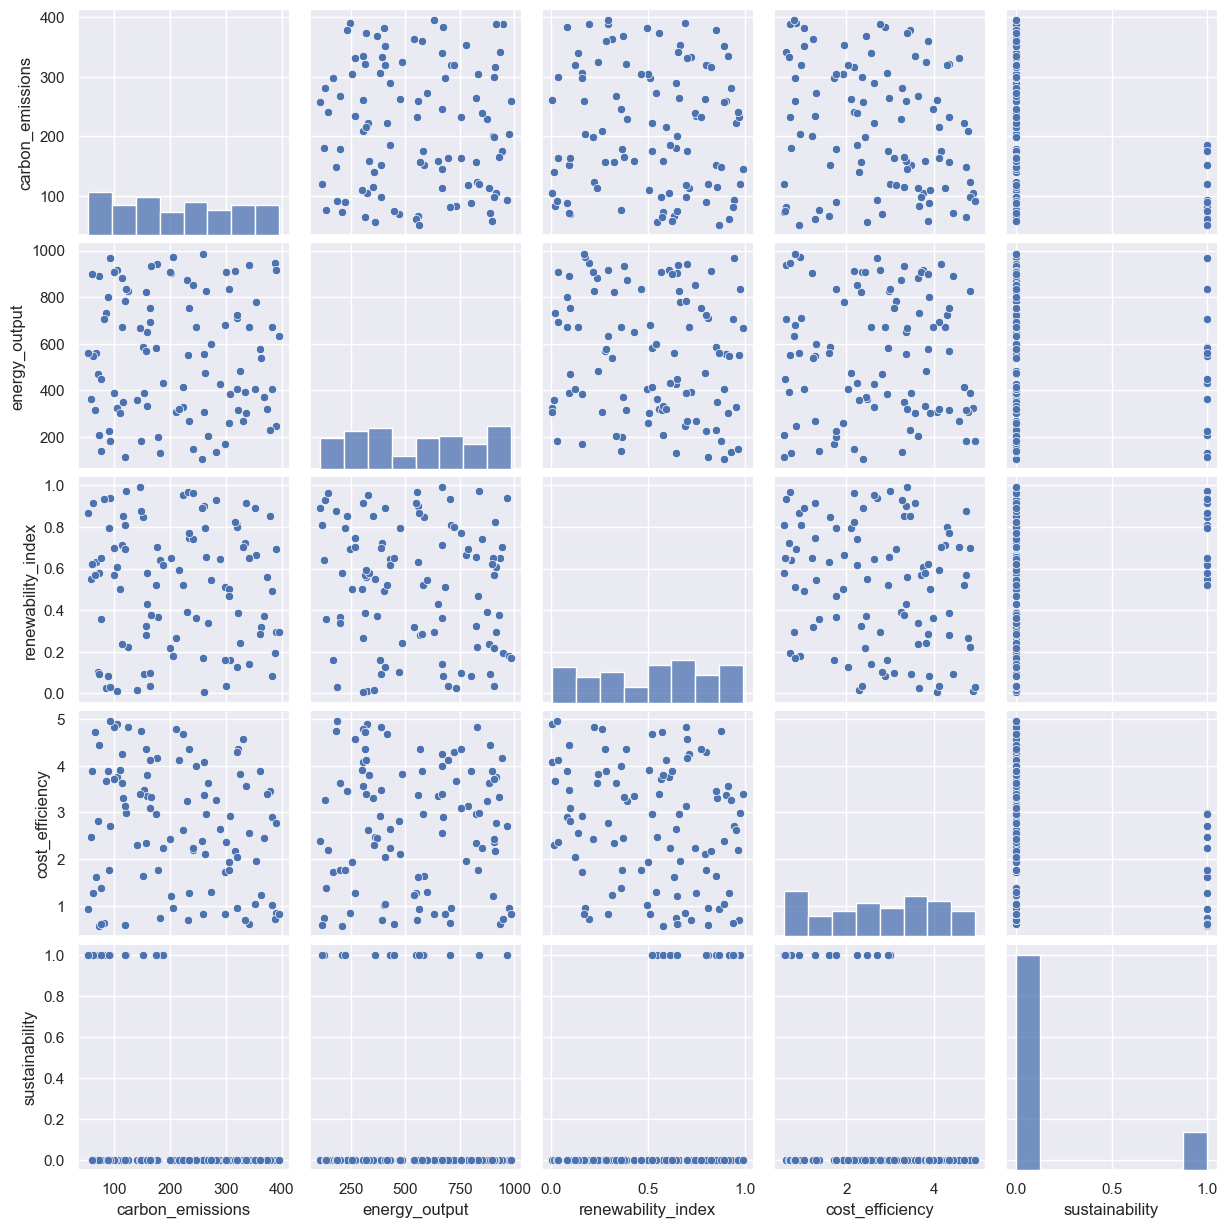

In [32]:


sns.pairplot(df)
plt.show()

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle



In [42]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.05


In [43]:

with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("linear_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
    
loaded_y_pred = loaded_model.predict(X_test)

In [44]:

import numpy as np

mse = mean_squared_error(y_test, loaded_y_pred)
mae = mean_absolute_error(y_test, loaded_y_pred)
r2 = r2_score(y_test, loaded_y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.05
Mean Absolute Error: 0.05
R2 Score: 0.6078431372549019


In [47]:
from sklearn.metrics import confusion_matrix
def create_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm


cm = create_confusion_matrix(y_test, y_pred)
print(cm)

[[17  0]
 [ 1  2]]


In [49]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [51]:
model.predict([[306.19787963399176,382.920382968694,0.16162871409461377,2.9328580472454795]])

c:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])